<a href="https://colab.research.google.com/github/laugustovieira/BootCamp-Data-Science/blob/main/Desafios_Modulo1_Aula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 4

#Importar Bibliotecas

In [52]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Carregar informações

In [53]:
dados = pd.read_csv("/content/drive/MyDrive/Dados_BootCamp/A005117189_28_143_208_2021_ATENDIMENTO.csv", encoding="ISO-8859-1",
            sep=";", skiprows = 3, skipfooter = 12, engine = "python", thousands = ",", decimal = ".")

#Tratar Dados

In [54]:
pd.options.display.float_format = "{:.2f}".format


#Desafio 01 - Escolher uma palete de cores mais adequada do matplotlib.




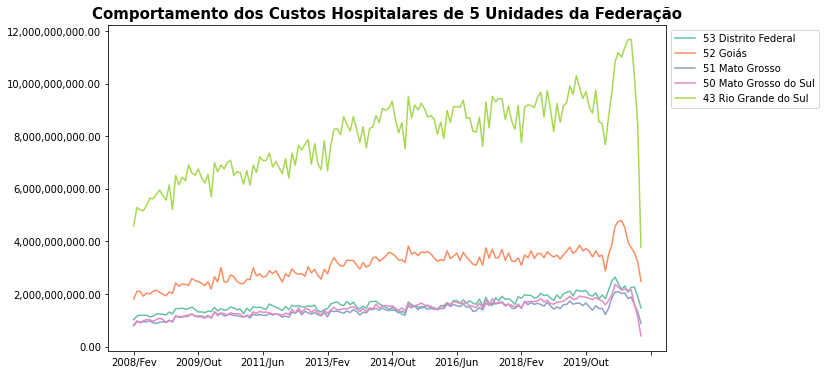

In [68]:
font = {'weight' : 'bold',
        'size'   : 15,
        'Color' : 'black'}

colunas_usaveis_def3 = dados.mean().index.tolist()
colunas_usaveis_def3.insert(0,"Unidade da Federação")

usaveis_def3 = dados[colunas_usaveis_def3]
usaveis_def3= usaveis_def3.drop("Total", axis=1)
usaveis_def3 = usaveis_def3.set_index("Unidade da Federação")
usaveis_ordenado = usaveis_def3.sort_values(by="Unidade da Federação", ascending=False)

coluna_cinco_estados = usaveis_ordenado.index.tolist()[:5]
usaveis_ordenado = usaveis_ordenado.loc[coluna_cinco_estados]
usaveis_ordenado = usaveis_ordenado[usaveis_ordenado.columns[6:]] 

ax = usaveis_ordenado.T.plot(figsize=(10,6))
plt.legend(bbox_to_anchor=(1,1))
sns.set_palette(sns.color_palette("Set2", 27))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Comportamento dos Custos Hospitalares de 5 Unidades da Federação", fontdict=font)
plt.rc("xtick", labelsize=10)
plt.show()

Dependendo que como é plotado o gráfico pode dar uma falsa sensação de crescimento. No exemplo abaixo, somente por mudar o tamanho da figura parece que o gráfico está crescendo mais.

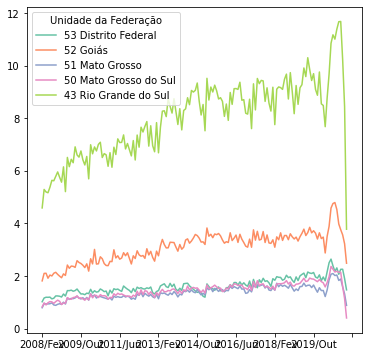

In [69]:
usaveis_ordenado = usaveis_ordenado/1000000000
usaveis_ordenado.T.plot(figsize=(6,6))

Ao aumentar o tamanho do gráfico dá a impressão que a os custos estão com uma leve inclinação, quase contantes.

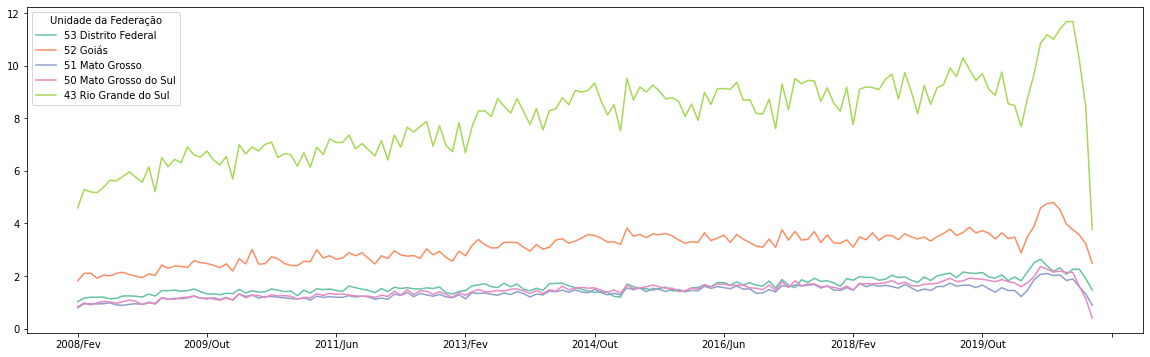

In [79]:

usaveis_ordenado.T.plot(figsize=(20,6))

Abaixo percebe-se que o valor inicial de y é 1 dando uma falsa sensação que a diferença entre "Rio Grande do Sul" é de 5 vezes "Goiás"
Ao cortar parte do gráfico deve estar muito atento a estes pontos

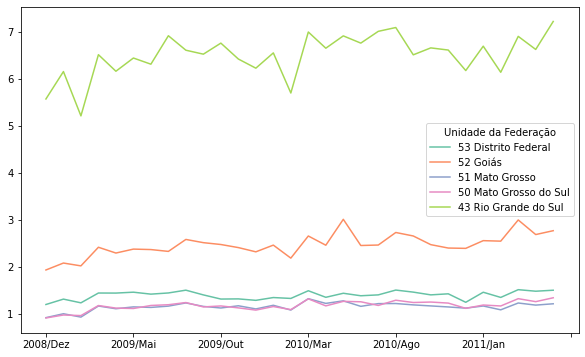

In [75]:

usaveis_ordenado[usaveis_ordenado.columns[10:40]].T.plot(figsize=(10,6))
#plt.ylim(0,12)

O mesmo gráfico, definindo o limite de y (mantendo a mesma escala) é de 2 vezes entre entre "Rio Grande do Sul" e "Goiás"

(0.0, 12.0)

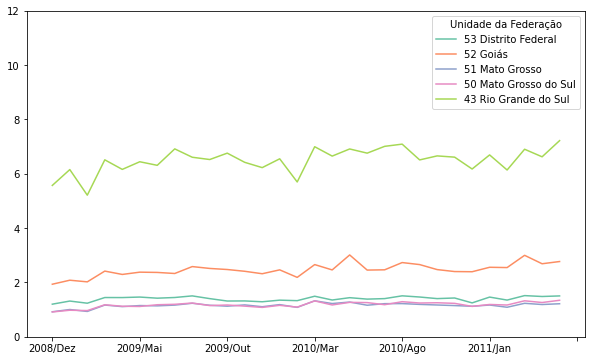

In [76]:
usaveis_ordenado[usaveis_ordenado.columns[10:40]].T.plot(figsize=(10,6))
plt.ylim(0,12)

**A chave segundo o que foi explicado é manter o eixo na mesma escala em todos os gráficos. Importante tomar cuidado com os recortes que podem distorcer os gráficos, pois as escalas podem mudar. Até o tamanho do gráfico impresso pode dar uma falsa sensação e levar a uma análise errada**